In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
data = pd.read_csv('loan_prediction_dataset.csv')


In [3]:

# Inspect the first few rows of the dataset
print(data.head())


   age  income_annum  work_exp  credit_score  loan_amount  loan_term  \
0   56        254000        47           784       707679         77   
1   69        903185        33           554       696677         81   
2   46        283994        23           783        38330        244   
3   32        769981        46           492        26394        254   
4   60        948313        10           711       367147        278   

  employment_status marital_status property_area  residential_assets_value  \
0          Employed         Single         Urban                    158099   
1        Unemployed        Widowed         Urban                    275879   
2          Employed       Divorced         Urban                     70352   
3        Unemployed        Married         Rural                    389416   
4          Employed        Married     Semiurban                    281717   

   commercial_assets_value  luxury_assets_value  bank_asset_value        dti  \
0                 

In [4]:
# Basic statistics
print(data.describe())
print(data.info())


                age   income_annum      work_exp  credit_score    loan_amount  \
count  25000.000000   25000.000000  25000.000000  25000.000000   25000.000000   
mean      43.449840  503047.955520     24.425120    552.906680  500896.850480   
std       14.982675  287684.535255     14.438671    167.079545  286902.431029   
min       18.000000   10056.000000      0.000000    300.000000    5027.000000   
25%       31.000000  252677.250000     12.000000    414.000000  251055.500000   
50%       43.000000  502951.000000     24.000000    528.000000  502624.000000   
75%       56.000000  753367.500000     37.000000    682.000000  748645.750000   
max       69.000000  999984.000000     49.000000    900.000000  999959.000000   

          loan_term  residential_assets_value  commercial_assets_value  \
count  25000.000000              25000.000000             25000.000000   
mean     184.990400             249704.100840            250161.254680   
std       99.824947             144752.838375   

In [5]:
# One-hot encode categorical variables except 'loan_status'
encoded_data = pd.get_dummies(data, columns=['employment_status', 'marital_status', 'property_area', 'previous_loan_history'])

In [6]:
# Label encode 'loan_status'
le = LabelEncoder()
encoded_data['loan_status'] = le.fit_transform(data['loan_status'])


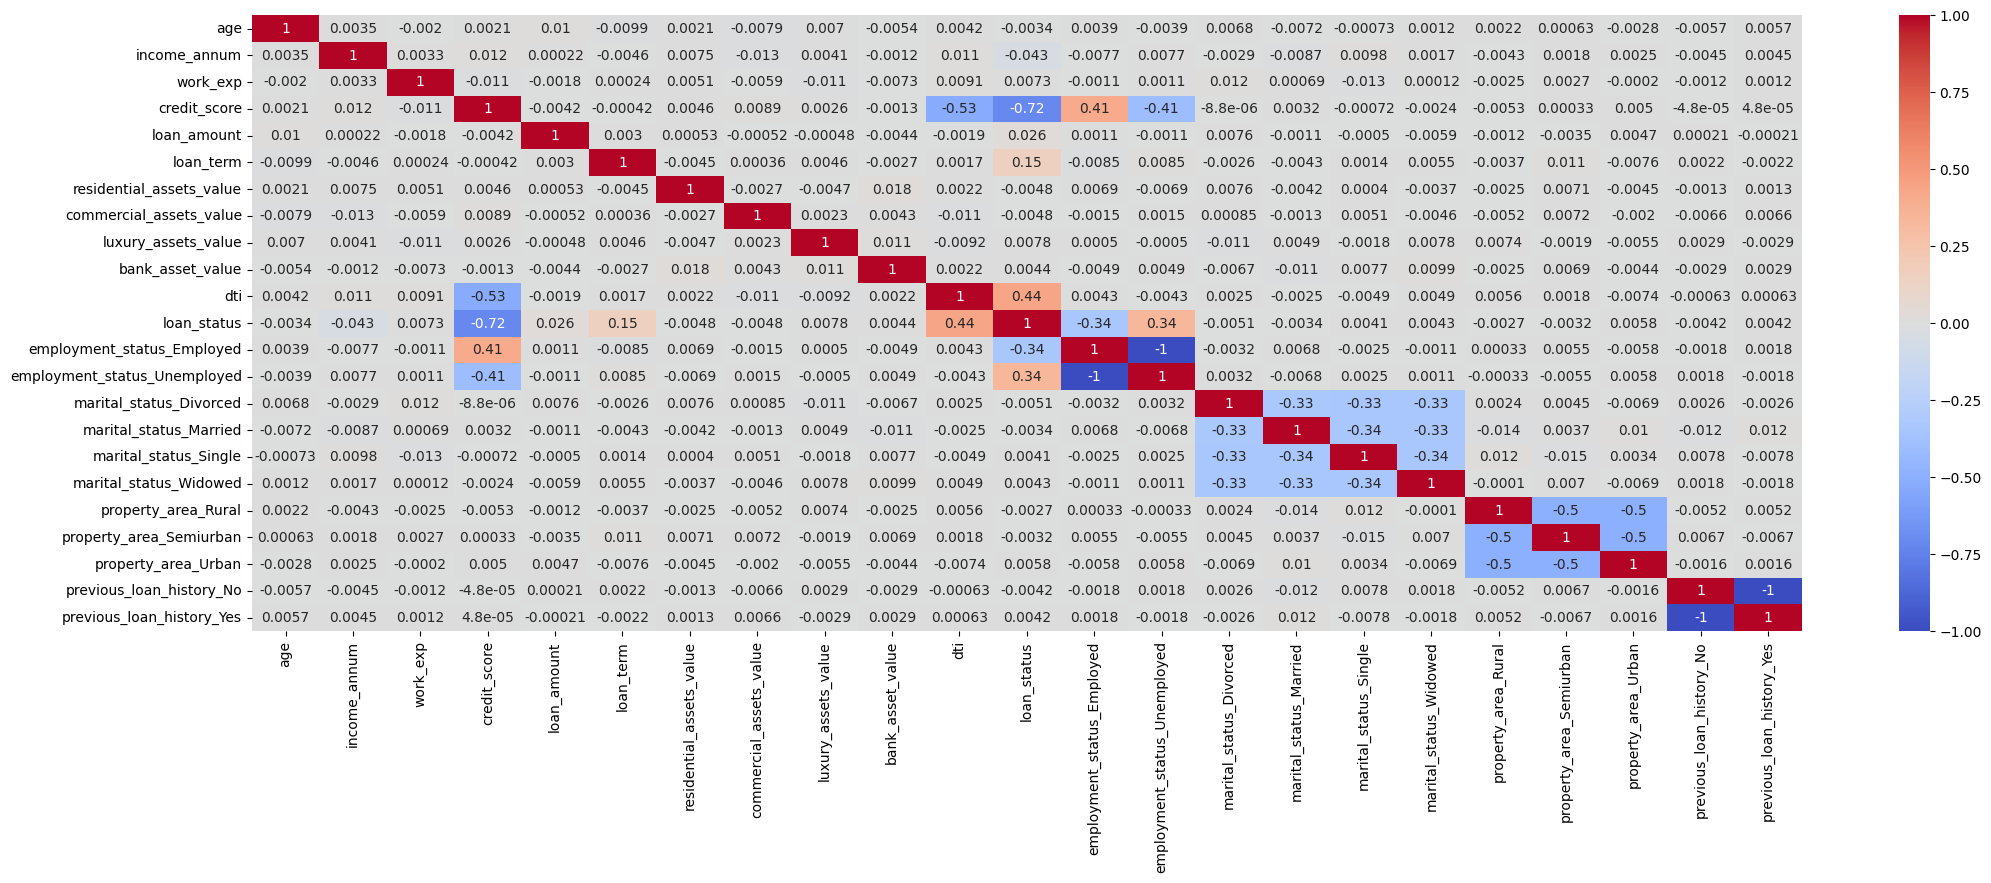

In [21]:

# Correlation matrix
plt.figure(figsize=(25, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm')
plt.show()

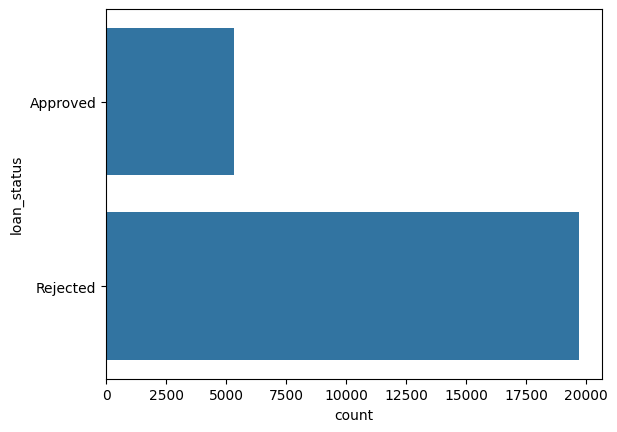

In [8]:
# Distribution of loan status
sns.countplot(data['loan_status'])
plt.show()

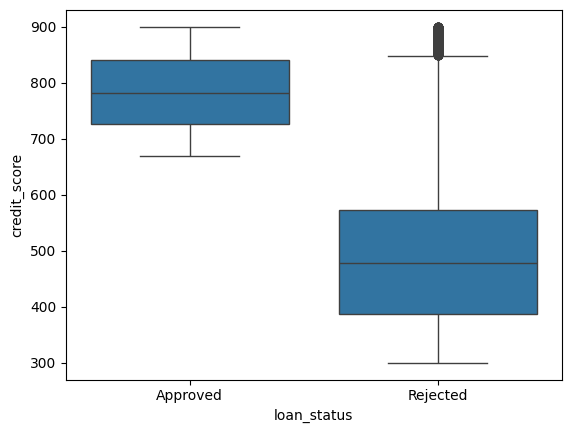

In [9]:
# Distribution of credit score by loan status
sns.boxplot(x='loan_status', y='credit_score', data=data)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [11]:
# Features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

In [12]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Preprocessing pipeline
numeric_features = ['age', 'income_annum', 'work_exp', 'credit_score', 'loan_amount', 'loan_term',
                    'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
                    'bank_asset_value', 'dti']
categorical_features = ['employment_status', 'marital_status', 'property_area', 'previous_loan_history']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [14]:
# Training pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [15]:
# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'income_annum',
                                                   'work_exp', 'credit_score',
                                                   'loan_amount', 'loan_term',
                                                   'residential_assets_value',
                                                   'commercial_assets_value',
                                                   'luxury_assets_value',
                                                   'bank_asset_value', 'dti']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['employment_status',
                                                   'marital_status',
                                                   'property_area',
                                                   'previous_loan_history'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [16]:

# Make predictions
y_pred = clf.predict(X_test)

In [17]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Approved       0.99      1.00      1.00      1003
    Rejected       1.00      1.00      1.00      3997

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [18]:
import joblib
joblib.dump(clf, 'loan_approval_model_2.pkl')

['loan_approval_model_2.pkl']